<img src="data/hor.png" width=800 height=800 />

**1**.(20 points)

On considère le système linéaire suivant:

$$(S) : \quad\left\{
\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}\right.$$

1. Trouver la notation matricielle du système $(S)$ sous la forme $Ax=b$ avec  $A$ et $b$ deux matrices que l'on implementera avec numpy. (5 points)
2. Montrer que $A$ est inversible (5 points)
3. Vérifier que $A$ possède une décomposition $LU$, résoudre le système $(S)$ en utilisiant cette décomposition (10 points)

In [1]:
import numpy as np
import scipy.linalg as la

In [2]:
A = np.array([
    [2, -1, 1],
    [-1, 2, -1],
    [1, -1, 1]
])

In [3]:
b = np.array([6,2,1]).reshape(-1,1)

In [4]:
la.det(A)

1.0

In [6]:
P, L, U = la.lu(A)
P

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
L

array([[ 1.        ,  0.        ,  0.        ],
       [-0.5       ,  1.        ,  0.        ],
       [ 0.5       , -0.33333333,  1.        ]])

In [8]:
U

array([[ 2.        , -1.        ,  1.        ],
       [ 0.        ,  1.5       , -0.5       ],
       [ 0.        ,  0.        ,  0.33333333]])

In [9]:
y = la.solve_triangular(L, b, lower=True)

In [10]:
y

array([[ 6.        ],
       [ 5.        ],
       [-0.33333333]])

In [11]:
x = la.solve_triangular(U, y, lower=False)

In [12]:
x

array([[ 5.],
       [ 3.],
       [-1.]])

In [14]:
la.inv(A).dot(b)

array([[ 5.],
       [ 3.],
       [-1.]])

In [17]:
A @ x,b

(array([[6.],
        [2.],
        [1.]]),
 array([[6],
        [2],
        [1]]))

**2**. (20 points)

On considére la séquence d'ADN suivante sous le format FASTA.
>Le format FASTA est utilisé pour stocker une ou plusieurs séquences, d'ADN, d'ARN ou de protéines. La première ligne débute par le caractère > et contient une description de la séquence. On appelle souvent cette ligne « ligne de description » ou « ligne de commentaire »

```python
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA
'''
```

1. Supprimez la ligne de commentaire et combinez les 4 lignes de symboles nucléotidiques en une seule chaîne (4 points)
2. Construire une matrice de transition de Markov empirique pour les probabilités de transition de n'importe quel nucléotide à n'importe quel autre nucléotide de cette chaîne (8 points)
3. Trouver la distribution stationaire de cette chaine ( Utiliser les vecteurs propre de $M^T$) (8 points)

In [33]:
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA'
'''
seq = ''.join(dna.strip().split('\n')[1:])
seq

"TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAACGACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGAGCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGGACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA'"

In [34]:
M=np.zeros((4,4))
M

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [36]:
pairs = zip(seq, seq[1:])
from collections import Counter
c=Counter(pairs)
c

Counter({('T', 'T'): 14,
         ('T', 'A'): 19,
         ('A', 'G'): 22,
         ('G', 'G'): 22,
         ('G', 'C'): 24,
         ('C', 'A'): 21,
         ('G', 'T'): 23,
         ('A', 'A'): 26,
         ('A', 'C'): 25,
         ('C', 'C'): 20,
         ('C', 'G'): 33,
         ('G', 'A'): 19,
         ('A', 'T'): 11,
         ('T', 'C'): 17,
         ('T', 'G'): 11,
         ('C', 'T'): 12,
         ('A', "'"): 1})

In [37]:
s={u for u in zip(seq, seq[1:])} 
l=[u for u in zip(seq, seq[1:])]
from functools import reduce
l.count(('T','T'))
dic={u:l.count(u) for u in s}
dic

{('T', 'C'): 17,
 ('A', 'G'): 22,
 ('T', 'T'): 14,
 ('G', 'G'): 22,
 ('A', 'A'): 26,
 ('G', 'A'): 19,
 ('C', 'T'): 12,
 ('C', 'C'): 20,
 ('A', "'"): 1,
 ('C', 'A'): 21,
 ('G', 'T'): 23,
 ('C', 'G'): 33,
 ('G', 'C'): 24,
 ('A', 'C'): 25,
 ('T', 'A'): 19,
 ('A', 'T'): 11,
 ('T', 'G'): 11}

In [45]:
M = np.zeros((4,4))
for i, x in enumerate('ACTG'):
    for j, y in enumerate('ACTG'):
        M[i, j] = c[(x, y)]
M

array([[26., 25., 11., 22.],
       [21., 20., 12., 33.],
       [19., 17., 14., 11.],
       [19., 24., 23., 22.]])

In [40]:
MM= np.zeros((4,4))
for i, x in enumerate('ACTG'):
    for j, y in enumerate('ACTG'):
        MM[i, j] = dic[(x, y)]
MM

array([[26., 25., 11., 22.],
       [21., 20., 12., 33.],
       [19., 17., 14., 11.],
       [19., 24., 23., 22.]])

In [46]:
w=M.sum(axis=1).reshape(4,1)
w
M,w


(array([[26., 25., 11., 22.],
        [21., 20., 12., 33.],
        [19., 17., 14., 11.],
        [19., 24., 23., 22.]]),
 array([[84.],
        [86.],
        [61.],
        [88.]]))

In [47]:
M = M/w
M

array([[0.30952381, 0.29761905, 0.13095238, 0.26190476],
       [0.24418605, 0.23255814, 0.13953488, 0.38372093],
       [0.31147541, 0.27868852, 0.2295082 , 0.18032787],
       [0.21590909, 0.27272727, 0.26136364, 0.25      ]])

In [49]:
e, v = la.eig(M.T)
e

array([ 1.        +0.j       ,  0.03786645+0.0984321j,
        0.03786645-0.0984321j, -0.05414276+0.j       ])

In [50]:
v 

array([[ 0.52737509+0.j        , -0.26318022-0.44557586j,
        -0.26318022+0.44557586j,  0.40452326+0.j        ],
       [ 0.533761  +0.j        , -0.08281119-0.03767378j,
        -0.08281119+0.03767378j, -0.51932821+0.j        ],
       [ 0.37172   +0.j        ,  0.63696557+0.j        ,
         0.63696557-0.j        , -0.47178041+0.j        ],
       [ 0.54662505+0.j        , -0.29097417+0.48324964j,
        -0.29097417-0.48324964j,  0.58658536+0.j        ]])

In [51]:
v = np.real_if_close(v[:, 0])
v

array([0.52737509, 0.533761  , 0.37172   , 0.54662505])

In [52]:
p = v/v.sum()

In [53]:
p

array([0.26642087, 0.26964692, 0.18778658, 0.27614562])

In [54]:
p @ M

array([0.26642087, 0.26964692, 0.18778658, 0.27614562])

**3**. (20 points)

Une laitière est au point A et doit se rendre au point B. Cependant, elle doit également remplir un seau d'eau de la rivière en route de A à B. L'équation du chemin de la rivière est illustrée dans la figure ci-dessous. Quelle est la distance minimale qu'elle doit parcourir pour faire cela ?

1. Résoudre ce problème avec  `scipy.optimize` et la minimisation avec contraintes (15 points)
2. Representer la solution (5 point)

![Milkmaid problem](data/milkmaid.png)

Hint: Il y a un optimum global et local pour ce problème 

In [57]:
import scipy.optimize as opt

In [81]:
def f(x, A, B):
    """Distance entre deux points"""
    
    return la.norm(x-A) + la.norm(x-B)

def g(x):
    """Equation de la rivière """

    return 10/(1+x)

A = np.array([2,8])
B = np.array([8,4])
cons = {'type': 'eq', 'fun': lambda x: x[1] - g(x[0])}

ms = [opt.minimize(f, [x0, g(x0)], args=(A, B), constraints=cons) for x0 in range(0, 11)]
m = min(ms, key=lambda res: res.fun)

print("Distance minimale", m.fun)
m

Distance minimale 9.963398299572699


     fun: 9.963398299572699
     jac: array([-1.65293813, -0.38808024])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.53225978, 6.5263085 ])

In [62]:
%matplotlib inline

import matplotlib.pyplot as plt

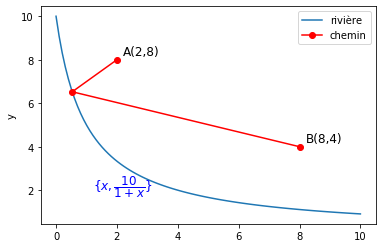

In [80]:
xp = np.linspace(0, 10, 100)
plt.plot(xp, g(xp),label='rivière')
plt.plot([A[0], m.x[0], B[0]], [A[1], m.x[1], B[1]], '-o', c='red',label='chemin')
plt.ylabel('y')
plt.legend()
plt.text(2.2,8.2, 'A(2,8)', fontsize=12);
plt.text(8.2,4.2, 'B(8,4)', fontsize=12);
plt.text(1.2,2., r'$\{x,\dfrac{10}{1+x}\}$', fontsize=12,c='b');